## ML Project : Used car price predition

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1. Objective
The objective of this project is to predict the price of used cars based on various attributes.

#### 2. Data Collection
- The Data scuorce : https://www.kaggle.com/competitions/playground-series-s4e9/data
- The data consist of 13 columns and 188533 rows

#### 2.1 Import data and required libraries
Import pandas,numpy,seaboen,matplotlib

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import re

Import data and store it in csv format

In [126]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')


Show top 5 rows

In [127]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


Get shape of the dataframe

In [128]:
train.shape

(188533, 13)

In [129]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [130]:
train.duplicated().sum()

0

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [132]:
train.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [133]:
train.describe()


,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [134]:
column = train.columns
numeric_features = [feature for feature in train.columns if train[feature].dtype != 'O']
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']

print('Numeric columns in dataframe : {}'.format(numeric_features))
print('Categorical columns in dataframe : {}'.format(categorical_features))

Numeric columns in dataframe : ['id', 'model_year', 'milage', 'price']
Categorical columns in dataframe : ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [135]:
for col in categorical_features:
    print('Total number of unique values in {} are {}:'.format(col,train[col].nunique()))
    print(train[col].unique(),'\n')

Total number of unique values in brand are 57:
['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach'] 

Total number of unique values in model are 1897:
['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL'] 

Total number of unique values in fuel_type are 7:
['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported'] 

Total number of unique values in engine are 1117:
['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0H

In [136]:
for i in train['fuel_type'].unique():
    print('Number of samples of {} in dataset are {} and some exaples are the following are \n {}'.format(i,len(train[train['fuel_type'] == i]),train[train['fuel_type'] == i]))

Number of samples of Gasoline in dataset are 165940 and some exaples are the following are 
             id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
5            5           Audi             A6 2.0T Sport        2018   40950   
...        ...            ...                       ...         ...     ...   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531  188531           Audi          S5 3.0T Prestige        2022   13895   
188532  188532        Porsche         

In [137]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [138]:
most_common = dict()
for i in categorical_features:
    value = str(train[i].value_counts()[:1].index.values[0])
    most_common[i] = value

In [139]:
def extract(df):
    df['transmission'] = df['transmission'].str.lower()
    df['transmission_type'] = df['transmission'].apply(lambda x:
        'manual' if 'm/t' in x or 'manual' in x or 'mt' in x else 
        'automatic' if 'a/t' in x or 'automatic' in x else
        'CVT' if 'CVT' in x else
        'dual' if 'dual' in x else 'other'
    )
    df['hoursepower'] = df['engine'].str.extract(r'(\d+\.\d+)(?=HP)').astype(float)
    df['capacity'] = df['engine'].str.extract(r'(\d+\.\d+)(?=L| Liter)').astype(float)
    df['Cylinder'] = df['engine'].apply(lambda x: x if pd.isnull(x)
                                    else float(re.search('(\d)\s(Cylinder)',x).group(1)) if re.search('(\d)\s(Cylinder)',x)
                                    else float(re.search('\s(V)(\d)', x ).group(2)) if re.search('\s(V)(\d)', x) else np.nan)
    #df['Cylinder'] = df[['engine','Cylinder']].apply(lambda x: pd.Series(x[0]).str.extract(r'\s(V)(\d)')[1].astype(float) if pd.isnull(x[1]) else x[1],axis=1)
    
    return df

In [140]:
extracted_train = extract(train)
extracted_test = extract(test)

In [141]:
extracted_train

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,transmission_type,hoursepower,capacity,Cylinder
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,a/t,Yellow,Gray,None reported,Yes,4200,automatic,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,a/t,Silver,Beige,At least 1 accident or damage reported,Yes,4999,automatic,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,a/t,Blue,Gray,None reported,Yes,13900,automatic,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,transmission w/dual shift mode,Black,Black,None reported,Yes,45000,dual,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-speed a/t,Black,Beige,None reported,Yes,97500,automatic,208.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,transmission w/dual shift mode,White,Beige,None reported,Yes,27500,dual,420.0,6.2,8.0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-speed a/t,White,Black,At least 1 accident or damage reported,Yes,30000,automatic,385.0,3.0,6.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-speed a/t,White,Black,None reported,Yes,86900,automatic,469.0,4.0,8.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-speed automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,automatic,NaN,3.0,NaN


In [142]:
train['int_col'].value_counts()

int_col
Black           107674
Beige            24495
Gray             21204
Brown             5810
Red               5145
                 ...  
Nougat Brown         7
Classic Red          7
Cobalt Blue          6
WHITE                6
ORANGE               4
Name: count, Length: 156, dtype: int64

In [143]:
train['brand'].value_counts()

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

In [144]:
model_sample = extracted_train['model'].value_counts()
low_models_samples = list(model_sample[model_sample.values < 101].index)

In [168]:
def fill_fuel_type(x):
    if pd.isnull(x[1]):
        if 'gasoline' in str.lower(x[0]):
            return 'Gasoline'
        elif 'flex' in str.lower(x[0]):
            return 'E85 Flex Fuel'
        elif (('plug-in'in str.lower(x[0])) or ('electric/gas' in str.lower(x[0]))):
            return 'Plug-In Hybrid'
        elif 'hybrid' in str.lower(x[0]):
            return 'Hybrid'
        elif 'electric' in str.lower(x[0]):
            return 'electric'
        else:
            return np.nan 
    else:
        return x[1]
    
    
def fill_missing_value(df):
    df['fuel_type'] = df[['engine','fuel_type']].apply(lambda x : fill_fuel_type(x),axis=1)
    df['fuel_type'].fillna('Gasoline',inplace=True)
    df['accident'].fillna('None reported',inplace=True)
    df['clean_title'].fillna('Yes' if 'None reported' in df['accident'] else 'No',inplace=True)
    for i in categorical_features:
        df[i] = df[i].replace('–',most_common[i])
    common_color = ['black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
        'beige', 'tan', 'orange', 'gold', 'yellow', 'purple', 'pink', 
        'charcoal', 'ivory', 'camel', 'chestnut', 'pearl', 'linen', 'graphite',
        'copper', 'slate', 'bronze', 'sand', 'amber','macchiato','ebony','cocoa']
    df['int_col'] = df['int_col'].apply(lambda x: x if [color for color in common_color if color in str.lower(x).split(' ')] == [] else [color for color in common_color if color in str.lower(x).split(' ')][0])
    df['ext_col'] = df['ext_col'].apply(lambda x: x if [color for color in common_color if color in str.lower(x).split(' ')] == [] else [color for color in common_color if color in str.lower(x).split(' ')][0])


    df['interior_rare_color'] = df['int_col'].apply(lambda x: 1 if str.lower(x) not in common_color else 0)
    df['exterior_rare_color'] = df['ext_col'].apply(lambda x: 1 if str.lower(x) not in common_color else 0)
    
    luxury_brands = ["Mercedes-Benz", "BMW", "Audi", "Porsche", "Land Rover","Land"
    "Lexus", "Cadillac", "Tesla", "INFINITI", "Jaguar", 
    "Bentley", "Maserati", "Lamborghini", "Genesis", "Rolls-Royce", 
    "Ferrari", "McLaren", "Aston Martin", "Lucid", "Lotus", 
    "Karma", "Bugatti", "Maybach"]
    df['is_luxry_brand'] = df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)
    df['age'] = df['model_year'].apply(lambda x: int(2025 - x))
    df['mile/year'] = df['milage']/df['age']
    df['cleaned_model'] = df['model'].apply(lambda x: x if x not in low_models_samples else 'others')
    df.drop(['i','brand','engine','model_year','transmission'],axis=1,inplace=True)
    return df

In [154]:
common_color = ['black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
        'beige', 'tan', 'orange', 'gold', 'yellow', 'purple', 'pink', 
        'charcoal', 'ivory', 'camel', 'chestnut', 'pearl', 'linen', 'graphite',
        'copper', 'slate', 'bronze', 'sand', 'amber','macchiato','ebony','cocoa']
pd.Series('Metalic Black').apply(lambda x: x.astype('str') if [color for color in common_color if color in str.lower(x).split(' ')] == [] else [color for color in common_color if color in str.lower(x).split(' ')][0])

0    black
dtype: object

In [156]:
extract_train = extracted_train.copy()
extract_test = extracted_test.copy()
cleaned_train_data = fill_missing_value(extract_train)
cleaned_test_data = fill_missing_value(extract_test)


In [72]:
cleaned_test_data.isnull().sum()

model                      0
milage                     0
fuel_type                  0
ext_col                    0
int_col                    0
accident                   0
clean_title                0
transmission_type          0
hoursepower            22181
capacity                4438
Cylinder               14607
interior_rare_color        0
exterior_rare_color        0
is_luxry_brand             0
age                        0
mile/year                  0
cleaned_model              0
dtype: int64

<Axes: xlabel='age', ylabel='Density'>

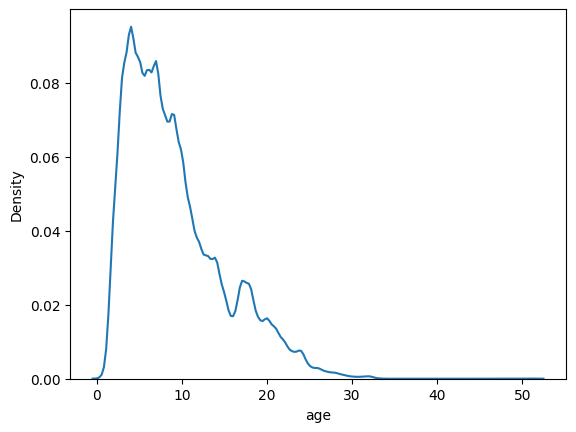

In [73]:
sns.kdeplot(x = 'age',data=cleaned_train_data)

<Axes: xlabel='mile/year', ylabel='price'>

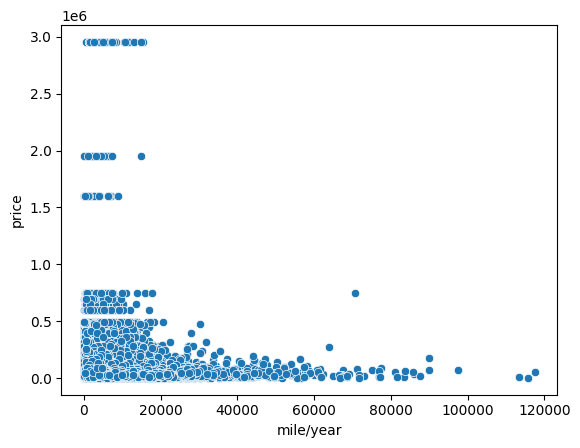

In [74]:
sns.scatterplot(x = 'mile/year',y='price',data= cleaned_train_data)

<Axes: xlabel='price', ylabel='Count'>

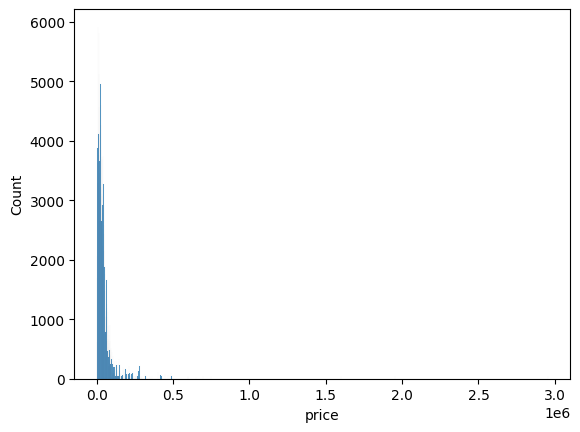

In [75]:
sns.histplot(cleaned_train_data['price'])

In [76]:
plt.figure(figsize=(20,10))
sns.boxplot(data = cleaned_train_data, x='brand',y='price',order=cleaned_train_data.groupby('brand')['price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation= 90)


KeyError: 'brand'

<Figure size 2000x1000 with 0 Axes>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, '7-speed'),
  Text(1, 0, 'A/T'),
  Text(2, 0, '7-speed manual'),
  Text(3, 0, '8-speed automatic with auto-shift'),
  Text(4, 0, '7-speed automatic with auto-shift'),
  Text(5, 0, '6-speed manual'),
  Text(6, 0, '8-speed manual'),
  Text(7, 0, '7-speed dct automatic'),
  Text(8, 0, '9-speed automatic with auto-shift'),
  Text(9, 0, 'manual'),
  Text(10, 0, '4-speed automatic'),
  Text(11, 0, '7-speed m/t'),
  Text(12, 0, '2-speed automatic'),
  Text(13, 0, 'single-speed fixed gear'),
  Text(14, 0, '1-speed automatic'),
  Text(15, 0, '8-speed automatic'),
  Text(16, 0, '10-speed automatic with overdrive'),
  Text(17, 0, '9-speed automatic'),
  Text(18, 0, '10-speed automatic'),
  Te

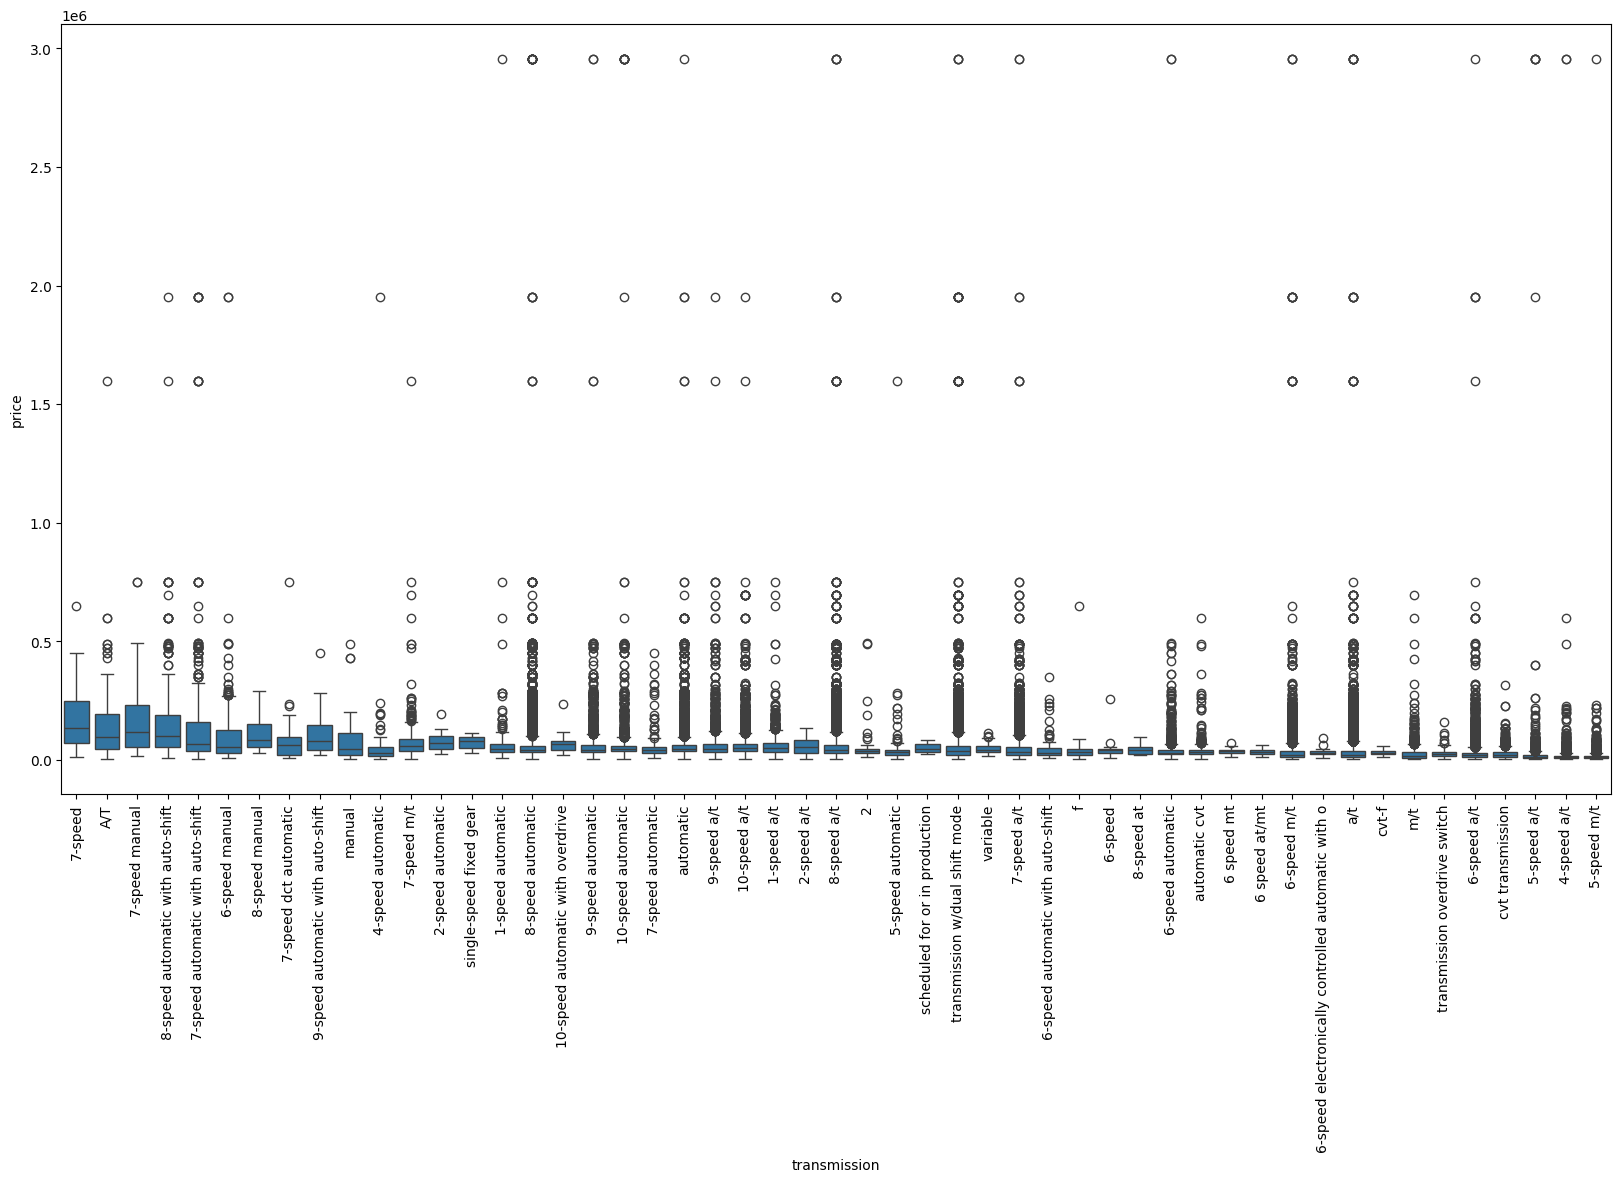

In [198]:
plt.figure(figsize=(20,10))
sns.boxplot(data = cleaned_train_data, x='transmission',y='price',order=cleaned_train_data.groupby('transmission')['price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation= 90)

In [199]:
cleaned_train_data.columns

Index(['model', 'milage', 'fuel_type', 'transmission', 'accident',
       'clean_title', 'price', 'transmission_type', 'hoursepower', 'capacity',
       'Cylinder', 'interior_rare_color', 'exterior_rare_color',
       'is_luxry_brand', 'age', 'mile/year'],
      dtype='object')

<Axes: >

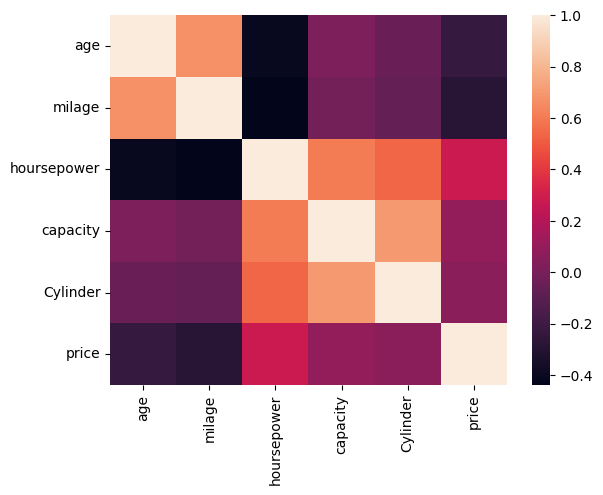

In [34]:
sns.heatmap(cleaned_train_data[['age','milage', 'hoursepower','capacity','Cylinder','price']].corr())

In [35]:
sns.scatterplot(x = 'model_year',y='price',data=cleaned_train_data)

ValueError: Could not interpret value `model_year` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='price', ylabel='Count'>

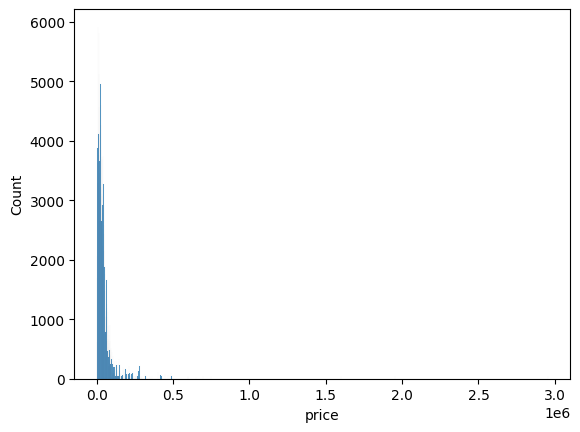

In [170]:
sns.histplot(cleaned_train_data['price'
])

In [171]:
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   model                188533 non-null  object 
 1   milage               188533 non-null  int64  
 2   fuel_type            188533 non-null  object 
 3   ext_col              188533 non-null  object 
 4   int_col              188533 non-null  object 
 5   accident             188533 non-null  object 
 6   clean_title          188533 non-null  object 
 7   price                188533 non-null  int64  
 8   transmission_type    188533 non-null  object 
 9   hoursepower          155274 non-null  float64
 10  capacity             181763 non-null  float64
 11  Cylinder             166634 non-null  float64
 12  interior_rare_color  188533 non-null  int64  
 13  exterior_rare_color  188533 non-null  int64  
 14  is_luxry_brand       188533 non-null  int64  
 15  age              

In [172]:
cleaned_train_data = cleaned_train_data[cleaned_train_data['price']<500000]
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188181 entries, 0 to 188532
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   model                188181 non-null  object 
 1   milage               188181 non-null  int64  
 2   fuel_type            188181 non-null  object 
 3   ext_col              188181 non-null  object 
 4   int_col              188181 non-null  object 
 5   accident             188181 non-null  object 
 6   clean_title          188181 non-null  object 
 7   price                188181 non-null  int64  
 8   transmission_type    188181 non-null  object 
 9   hoursepower          155049 non-null  float64
 10  capacity             181427 non-null  float64
 11  Cylinder             166335 non-null  float64
 12  interior_rare_color  188181 non-null  int64  
 13  exterior_rare_color  188181 non-null  int64  
 14  is_luxry_brand       188181 non-null  int64  
 15  age                  1

In [173]:
X = cleaned_train_data.drop('price',axis=1)
y = cleaned_train_data['price']

In [174]:
xtrain,xcom,ytrain,ycom  =  train_test_split(X,y,test_size=0.3,random_state=32)
xtest,xval,ytest,yval = train_test_split(xcom,ycom,test_size=0.3,random_state=32)

In [78]:
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   model                188533 non-null  object 
 1   milage               188533 non-null  int64  
 2   fuel_type            188533 non-null  object 
 3   ext_col              188533 non-null  object 
 4   int_col              188533 non-null  object 
 5   accident             188533 non-null  object 
 6   clean_title          188533 non-null  object 
 7   price                188533 non-null  int64  
 8   transmission_type    188533 non-null  object 
 9   hoursepower          155274 non-null  float64
 10  capacity             181763 non-null  float64
 11  Cylinder             166634 non-null  float64
 12  interior_rare_color  188533 non-null  int64  
 13  exterior_rare_color  188533 non-null  int64  
 14  is_luxry_brand       188533 non-null  int64  
 15  age              

In [79]:
cleaned_train_data.columns

Index(['model', 'milage', 'fuel_type', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'transmission_type', 'hoursepower', 'capacity',
       'Cylinder', 'interior_rare_color', 'exterior_rare_color',
       'is_luxry_brand', 'age', 'mile/year', 'cleaned_model'],
      dtype='object')

In [158]:
numeric_features = ['milage','hoursepower', 'capacity',
       'Cylinder', 'interior_rare_color', 'exterior_rare_color',
       'is_luxry_brand', 'age', 'mile/year']
categorical_features = ['cleaned_model','fuel_type','transmission_type','accident','clean_title','int_col','ext_col','model']

In [159]:
xtrain

,model,milage,fuel_type,ext_col,int_col,accident,clean_title,transmission_type,hoursepower,capacity,Cylinder,interior_rare_color,exterior_rare_color,is_luxry_brand,age,mile/year,cleaned_model
10700,Q7 Premium Plus,7758,Hybrid,black,black,None reported,No,automatic,NaN,3.0,NaN,0,0,1,6,1293.000000,Q7 Premium Plus
103078,F-150 Platinum,73091,Gasoline,black,black,None reported,Yes,dual,365.0,3.5,6.0,0,0,0,10,7309.100000,F-150 Platinum
108054,M3 Base,18362,Gasoline,white,black,None reported,Yes,manual,414.0,4.0,8.0,0,0,1,13,1412.461538,M3 Base
22459,Grand Cherokee L Limited,24778,Gasoline,Metallic,black,None reported,No,automatic,NaN,3.6,6.0,0,1,0,3,8259.333333,Grand Cherokee L Limited
127860,Ghost Base,9989,Gasoline,white,black,None reported,Yes,automatic,563.0,6.7,2.0,0,0,1,10,998.900000,Ghost Base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60284,Rover Discovery HSE,22829,Gasoline,blue,Tan/Ebony,None reported,No,automatic,NaN,3.0,6.0,1,0,0,4,5707.250000,others
75062,Transit Connect XLT,117697,Gasoline,blue,gray,At least 1 accident or damage reported,Yes,automatic,169.0,2.5,4.0,0,0,0,11,10699.727273,Transit Connect XLT
130949,Wagoneer Series III,61802,Gasoline,red,black,None reported,Yes,automatic,NaN,5.7,8.0,0,0,0,5,12360.400000,others
108075,Tahoe LTZ,162731,E85 Flex Fuel,black,gray,None reported,Yes,automatic,320.0,5.3,8.0,0,0,0,12,13560.916667,Tahoe LTZ


In [175]:
numeric_features_pipeline = Pipeline(
    [   
        ('fillna',SimpleImputer(strategy='median')),
        ('Scale',MaxAbsScaler())
    ]
)

categorical_features_pipeline = Pipeline(
    [
        ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=True)),
        ('sclae',MaxAbsScaler())
    ]
)

transformer = ColumnTransformer(
    [
        ('numerical',numeric_features_pipeline,numeric_features),
        ('categorical',categorical_features_pipeline,categorical_features)
    ]
)

xtrain_transfromed_array = transformer.fit_transform(xtrain).toarray()
xtest_transfromed_array = transformer.transform(xtest).toarray()
xval_transformed_array = transformer.transform(xval).toarray()

c:\Projects\Used Car Price prediction\venv1\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Projects\Used Car Price prediction\venv1\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [176]:
pd.DataFrame(xtrain_transfromed_array).to_pickle('xtrain_transfromed.csv')
pd.DataFrame(xtest_transfromed_array).to_pickle('xtest_transfromed.csv')
pd.DataFrame(xval_transformed_array).to_pickle('xtval_transfromed.csv')

In [177]:
pd.DataFrame(ytrain).to_pickle('ytrain.pkl')
pd.DataFrame(ytest).to_pickle('ytest.pkl')
pd.DataFrame(yval).to_pickle('yval.pkl')

In [178]:
pd.DataFrame(transformer.transform(X).toarray()).to_pickle('X.csv')
pd.DataFrame(transformer.transform(cleaned_test_data).toarray()).to_pickle('clean_test.csv')


c:\Projects\Used Car Price prediction\venv1\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Projects\Used Car Price prediction\venv1\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [179]:
pd.DataFrame(y).to_pickle('y.csv')